#### A quick check on FAMD analysis

In [145]:
# installing the needed library (prince :)) )
%pip install prince 
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [146]:
# importing the various library needed 

import pandas as pd
import numpy as np
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [147]:
# importing the dataset 
data = pd.read_csv('dataset.csv')
data

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ccs_3,ccs_4,ccs_5,ccs_6,ccs_7,ccs_8,ccs_9,ccs_10,ccs_11,ccs_12
0,42.0,1,5.0,1,18000,0,0.0,1.0,0,0,...,5.0,1.0,4.0,3.0,0,4,0,0,3,1
1,51.0,3,18.0,1,23000,0,0.0,0.0,0,0,...,3.0,6.0,6.0,1.0,0,1,4,0,3,6
2,40.0,0,8.0,1,10000,0,0.0,0.0,0,1,...,6.0,6.0,6.0,0.0,5,0,2,1,6,3
3,19.0,0,25.0,5,31000,2,1.0,0.0,0,2,...,6.0,4.0,0.0,4.0,6,0,1,1,0,4
4,42.0,2,13.0,1,40000,0,NaN,0.0,0,1,...,6.0,6.0,0.0,0.0,6,1,1,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,29.0,2,18.0,0,25000,0,2.0,0.0,2,0,...,4.0,4.0,0.0,6.0,6,0,2,3,2,5
156,40.0,1,13.0,5,27000,2,1.0,2.0,0,2,...,6.0,1.0,1.0,1.0,1,6,0,0,0,6
157,40.0,0,13.0,0,26000,0,0.0,2.0,1,0,...,4.0,6.0,0.0,2.0,2,0,4,2,1,4
158,41.0,1,8.0,1,11000,0,NaN,1.0,0,0,...,0.0,1.0,0.0,1.0,3,4,0,0,4,2


In [148]:
# dropping the last two questionnaires 
colsofinterest = data.columns[:29]
data = data[colsofinterest]

In [149]:
# all the various data analysis has been already done in previous notebooks and programs so this one is just centered on doing the FAMD analysis and the following clustering of the data
# so right now let's go directly to the filling of the missing values using the mode as value
data = data.fillna(data.mode().iloc[0])

In [150]:
# making categorical features of types object (and just to be sure changing all the numerical data in float)
numcols = ['age', 'income']
num = data[numcols]
cat = data.drop(numcols, axis = 1)
cat = cat.astype('object')
num = num.astype('float')

# concatentating the two dataframes
completedata = pd.concat([num, cat], axis = 1)
completedata

,age,income,gender,education,marital,phq_1,phq_2,phq_3,phq_4,phq_5,...,gad_6,gad_7,eheals_1,eheals_2,eheals_3,eheals_4,eheals_5,eheals_6,eheals_7,eheals_8
0,42.0,18000.0,1,5.0,1,0,0.0,1.0,0,0,...,0.0,0.0,3.0,5.0,3.0,2.0,1.0,0,2,2.0
1,51.0,23000.0,3,18.0,1,0,0.0,0.0,0,0,...,0.0,1.0,2.0,4.0,4.0,4.0,4.0,4,0,3.0
2,40.0,10000.0,0,8.0,1,0,0.0,0.0,0,1,...,0.0,1.0,0.0,4.0,2.0,4.0,3.0,3,4,0.0
3,19.0,31000.0,0,25.0,5,2,1.0,0.0,0,2,...,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5,5,5.0
4,42.0,40000.0,2,13.0,1,0,0.0,0.0,0,1,...,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,29.0,25000.0,2,18.0,0,0,2.0,0.0,2,0,...,3.0,3.0,5.0,3.0,5.0,5.0,5.0,5,5,5.0
156,40.0,27000.0,1,13.0,5,2,1.0,2.0,0,2,...,0.0,2.0,3.0,5.0,5.0,5.0,5.0,0,3,5.0
157,40.0,26000.0,0,13.0,0,0,0.0,2.0,1,0,...,0.0,2.0,5.0,5.0,5.0,5.0,5.0,3,4,0.0
158,41.0,11000.0,1,8.0,1,0,0.0,1.0,0,0,...,1.0,1.0,4.0,3.0,3.0,4.0,1.0,3,4,4.0


In [166]:
#trying to do the famd???
famd = FAMD(
    n_components = 15,
    n_iter = 100000,
    copy = True,
    check_input = True,
    random_state = 42,
    engine = "sklearn",
    handle_unknown = "error"  
)
famd.fit_transform(completedata)

C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-2.027929979067325, -2.2912878474779204, -2.1534855467358027, -0.8366600265340756, -1.7748239349298849, -2.2332711434127295, -1.724818831066034, -1.2196310917650468, -1.0246950765959597, -0.6614378277661477, -1.5083103128998356, -1.8708286933869707, -2.457132475061123, -0.9810708435174293, -1.1067971810589328, -1.9170289512680816, -2.595669470483482, -0.8874119674649424, -1.355544171172596, -1.387443692551161, -0.7826237921249264, -0.9354143466934853, -1.3228756555322954, -1.6992645467966427, -2.4392621835300936, -0.5123475382979799, -1.0665364503850772, -1.2549900398011136, -1.9843134832984428, -2.5446021299998947, -1.2893796958227628, -1.8472953201911166, -2.329162939770423, -1.1832159566199234, -2.4212600025606505, -0.724568837309472, -2.509980079602227, -1.620185174601965, -1.5370426148939398, -1.6469669092000605, -2.384848003542364, -1.79930542

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-14.259078,-4.649429,3.726687,5.157774,3.872088,-8.297335,-3.653743,-1.132479,-8.009400,-11.037245,1.356014,-8.817989,-7.504779,1.105127,1.805018
1,-13.767552,-5.281290,-8.857353,-2.895738,5.158860,4.400097,-4.700387,0.683032,5.516215,6.156447,6.267128,3.606118,3.405001,-7.871994,-5.030107
2,-14.202764,-4.979159,-4.364294,-3.689478,7.090093,7.765623,-3.406359,6.544247,10.131244,3.374218,3.201822,1.067178,0.263083,8.854933,-0.848355
3,19.792148,-5.085729,2.892067,3.594777,-4.161600,3.562797,-4.169299,2.044575,5.344348,2.339965,4.082720,8.129856,-3.563961,-3.312881,7.002597
4,0.724557,15.511736,-2.430451,-0.593289,-8.440018,-13.981161,8.655757,-1.250865,-1.163676,-6.955764,4.288066,4.659617,5.707384,-0.213486,4.957871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15.973463,-7.346499,-1.576628,-4.139684,-1.043113,-7.126894,1.326213,8.847913,-2.835272,-1.928559,0.218898,-0.653328,3.366303,1.443388,1.114069
156,1.875795,9.324775,-1.485568,8.384400,-6.731121,-1.507158,-11.372164,2.686151,0.052579,6.833214,-2.611743,-0.183586,-8.549030,-4.364869,2.052186
157,2.257540,3.118374,-2.009416,-3.576315,2.132561,2.664263,-1.234769,-7.129406,6.413173,2.731865,5.324189,-6.373057,0.046838,7.628239,-3.370899
158,-12.909057,-8.574507,1.518567,-6.967790,12.067857,-3.563237,-0.568185,0.298451,-4.724628,-12.333824,-2.660745,-0.971253,-2.472659,1.038386,-5.894514


In [165]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,138.919,10.54%,10.54%
1,61.662,4.68%,15.22%
2,40.010,3.04%,18.25%
3,38.517,2.92%,21.18%
4,34.911,2.65%,23.83%
5,34.285,2.60%,26.43%
6,33.382,2.53%,28.96%
7,31.736,2.41%,31.37%
8,31.006,2.35%,33.72%


In [164]:
# applying kmeans clustering to the famd data found 
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(famd.row_coordinates(completedata))
completedata['cluster'] = kmeans.labels_

C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-2.2912878474779204, -2.027929979067325, -2.1534855467358027, -0.8366600265340756, -1.7748239349298849, -2.2332711434127295, -1.724818831066034, -1.2196310917650468, -1.0246950765959597, -0.6614378277661477, -1.5083103128998356, -1.8708286933869707, -2.457132475061123, -0.9810708435174293, -1.1067971810589328, -1.9170289512680816, -2.595669470483482, -0.8874119674649424, -1.355544171172596, -1.387443692551161, -0.7826237921249264, -0.9354143466934853, -1.3228756555322954, -1.6992645467966427, -2.4392621835300936, -0.5123475382979799, -1.0665364503850772, -1.2549900398011136, -1.9843134832984428, -2.5446021299998947, -1.2893796958227628, -1.8472953201911166, -2.329162939770423, -1.1832159566199234, -2.4212600025606505, -0.724568837309472, -2.509980079602227, -1.620185174601965, -1.5370426148939398, -1.6469669092000605, -2.384848003542364, -1.79930542

In [154]:
# dividing the samples per clusters and plotting them 
cluster0 = completedata.loc[completedata.cluster == 0]
cluster1 = completedata.loc[completedata.cluster == 1]
cluster2 = completedata.loc[completedata.cluster == 2]

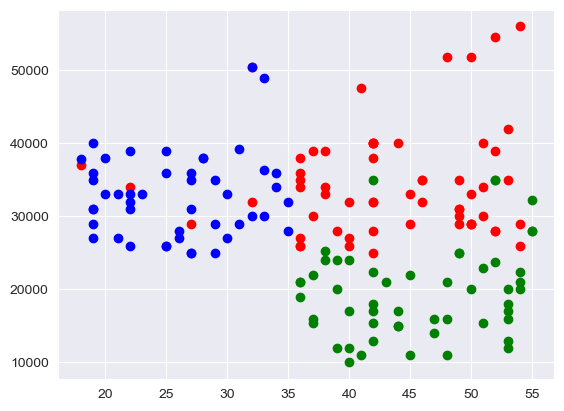

In [155]:
# plotting the clusters using the first two arguments of the famd analysis
plt.scatter(cluster0.iloc[:,0], cluster0.iloc[:,1], color = 'red')
plt.scatter(cluster1.iloc[:,0], cluster1.iloc[:,1], color = 'blue')
plt.scatter(cluster2.iloc[:,0], cluster2.iloc[:,1], color = 'green')
plt.show()